# Parameter identification example

Here is a simple toy model that we use to demonstrate the working of the inference package

$\emptyset \xrightarrow[]{k_1} X \; \; \; \; X \xrightarrow[]{d_1} \emptyset$

### Run the MCMC algorithm to identify parameters from the experimental data 

Sample log-like: 339.5582062942474
Sample log-like: 339.44530958791387
Sample log-like: 339.5116654248694
Sample log-like: 339.56324828934277
Sample log-like: 339.53479493328865
Sample log-like: 339.52826595563147
Sample log-like: 339.5404956024204
Sample log-like: 339.4594420123598
Sample log-like: 339.4628320894954
Sample log-like: 339.5284723042517
Sample log-like: 339.550202252341
Sample log-like: 339.4388273540311
Sample log-like: 339.47668889815316
Sample log-like: 339.449215032333
Sample log-like: 339.49695852246464
Sample log-like: 339.4840223736277
Sample log-like: 339.50847607719203
Sample log-like: 339.5324880817818
Sample log-like: 339.4731249476803
Sample log-like: 339.4693927389901
Sample log-like: 339.5780945544205
Sample log-like: 339.532670631196
Sample log-like: 339.4518136878838
Sample log-like: 339.50253438153163
Sample log-like: 339.53415701561426
Sample log-like: 339.49163338330465
Sample log-like: 339.3996921213384
Sample log-like: 339.52530594501246
Sample log-l

c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\emcee\ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\emcee\ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


0.0 percent complete
0.1 percent complete
0.2 percent complete
0.3 percent complete
0.4 percent complete
0.5 percent complete
0.6 percent complete
0.7 percent complete
0.8 percent complete
0.9 percent complete
1.0 percent complete
1.1 percent complete
1.2 percent complete
1.3 percent complete
1.4 percent complete
1.5 percent complete
1.6 percent complete
1.7 percent complete
1.8 percent complete
1.9 percent complete
2.0 percent complete
2.1 percent complete
2.2 percent complete
2.3 percent complete
2.4 percent complete
2.5 percent complete
2.6 percent complete
2.7 percent complete
2.8 percent complete
2.9 percent complete
3.0 percent complete
3.1 percent complete
3.2 percent complete
3.3 percent complete
3.4 percent complete
3.5 percent complete
3.6 percent complete
3.7 percent complete
3.8 percent complete
3.9 percent complete
4.0 percent complete
4.1 percent complete
4.2 percent complete
4.3 percent complete
4.4 percent complete
4.5 percent complete
4.6 percent complete
4.7 percent c

c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_continuous_distns.py:77: RuntimeWarning: overflow encountered in square
  return np.exp(-x**2/2.0) / _norm_pdf_C


6.1 percent complete
6.2 percent complete
6.3 percent complete
6.4 percent complete
6.5 percent complete
6.6 percent complete
6.7 percent complete
6.8 percent complete
6.9 percent complete
7.0 percent complete
7.1 percent complete
7.2 percent complete
7.3 percent complete
7.4 percent complete


c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\bioscrape\pid_interfaces.py:151: RuntimeWarning: overflow encountered in exp
  params_exp = np.exp(log_params)


7.5 percent complete
7.6 percent complete
7.7 percent complete
7.8 percent complete
7.9 percent complete
8.0 percent complete
8.1 percent complete
8.2 percent complete
8.3 percent complete
8.4 percent complete
8.5 percent complete
8.6 percent complete
8.7 percent complete
8.8 percent complete
8.9 percent complete
9.0 percent complete
9.1 percent complete
9.2 percent complete
9.3 percent complete
9.4 percent complete
9.5 percent complete
9.6 percent complete
9.7 percent complete
9.8 percent complete
9.9 percent complete
10.0 percent complete
10.1 percent complete
10.2 percent complete
10.3 percent complete
10.4 percent complete
10.5 percent complete
10.6 percent complete
10.7 percent complete
10.8 percent complete
10.9 percent complete
11.0 percent complete
11.1 percent complete
11.2 percent complete
11.3 percent complete
11.4 percent complete
11.5 percent complete
11.6 percent complete
11.7 percent complete
11.8 percent complete
11.9 percent complete
12.0 percent complete
12.1 percent 

44.9 percent complete
45.0 percent complete
45.1 percent complete
45.2 percent complete
45.3 percent complete
45.4 percent complete
45.5 percent complete
45.6 percent complete
45.7 percent complete
45.8 percent complete
45.9 percent complete
46.0 percent complete
46.1 percent complete
46.2 percent complete
46.3 percent complete
46.4 percent complete
46.5 percent complete
46.6 percent complete
46.7 percent complete
46.8 percent complete
46.9 percent complete
47.0 percent complete
47.1 percent complete
47.2 percent complete
47.3 percent complete
47.4 percent complete
47.5 percent complete
47.6 percent complete
47.7 percent complete
47.8 percent complete
47.9 percent complete
48.0 percent complete
48.1 percent complete
48.2 percent complete
48.3 percent complete
48.4 percent complete
48.5 percent complete
48.6 percent complete
48.7 percent complete
48.8 percent complete
48.9 percent complete
49.0 percent complete
49.1 percent complete
49.2 percent complete
49.3 percent complete
49.4 perce

82.3 percent complete
82.4 percent complete
82.5 percent complete
82.6 percent complete
82.7 percent complete
82.8 percent complete
82.9 percent complete
83.0 percent complete
83.1 percent complete
83.2 percent complete
83.3 percent complete
83.4 percent complete
83.5 percent complete
83.6 percent complete
83.7 percent complete
83.8 percent complete
83.9 percent complete
84.0 percent complete
84.1 percent complete
84.2 percent complete
84.3 percent complete
84.4 percent complete
84.5 percent complete
84.6 percent complete
84.7 percent complete
84.8 percent complete
84.9 percent complete
85.0 percent complete
85.1 percent complete
85.2 percent complete
85.3 percent complete
85.4 percent complete
85.5 percent complete
85.6 percent complete
85.7 percent complete
85.8 percent complete
85.9 percent complete
86.0 percent complete
86.1 percent complete
86.2 percent complete
86.3 percent complete
86.4 percent complete
86.5 percent complete
86.6 percent complete
86.7 percent complete
86.8 perce

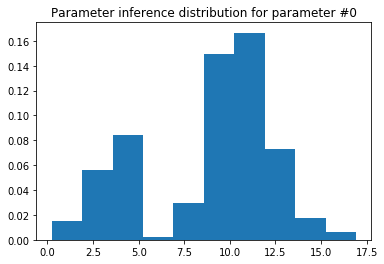

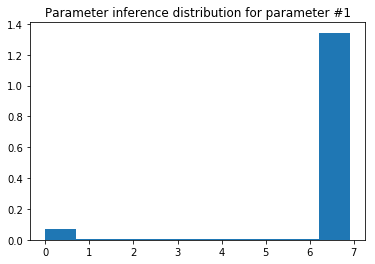

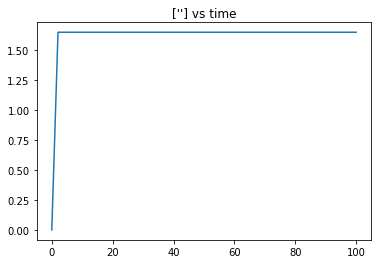

In [1]:
%matplotlib inline
import bioscrape as bs
from bioscrape.types import Model
from bioscrape.simulator import py_simulate_model
from bioscrape.pid_interfaces import *
from bioscrape.emcee_interface import *
import numpy as np
import pylab as plt
import pandas as pd

pid = initialize_mcmc()
# Import bioscrape XML / bioscrape model object M / SBML file
# M  = bs.types.read_model_from_sbml(filename)
pid.M = Model('models/toy_model.xml')


# Import data from CSV
data_list = []
data = pd.read_csv('test_data.csv', delimiter = '\t', names = ['X', 'time'], skiprows = 1)
data_list.append(list(data.get('X')))
pid.exp_data = np.array(data_list)


pid.prior = {'k1' : ['uniform', 1e-2, 1e3],'d1' : ['gaussian', 0.2, 100, 1e-3]}
pid.params_to_estimate = {'k1':10, 'd1':0.2}
pid.timepoints = np.linspace(0, 100, 50)

pid.type = 'deterministic'


fitted_model, params = pid.run_mcmc(plot_show = True, progress = False)

### Plot the results 

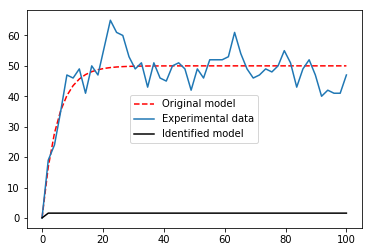

In [9]:
timepoints = pid.timepoints
M_original = Model('toy_model.xml')
sim_x = py_simulate_model(timepoints, Model = M_original, stochastic = False)
sim_x_inf = py_simulate_model(timepoints, Model = fitted_model, stochastic = False)
plt.plot(timepoints, sim_x['X'], 'r--', label = 'Original model')
plt.plot(timepoints, data.get('X'), label = 'Experimental data')
plt.plot(timepoints, sim_x_inf['X'], 'k', label = 'Identified model')

plt.legend()

## Alll methods above have other advanced options that you can use. Refer to Parameter Identification Tools notebook for more details. There are many other tools available such as for multiple initial conditions and timepoints for each trajectory, options for the estimator etc.

In [5]:
data

,X,time
0,0.0,0.000000
1,19.0,2.040816
2,24.0,4.081633
3,35.0,6.122449
4,47.0,8.163265
5,46.0,10.204082
6,49.0,12.244898
7,41.0,14.285714
8,50.0,16.326531
9,47.0,18.367347


In [40]:
pid.timepoints.shape[0]

50

In [9]:
ss = pid.M.get_species_dictionary()
res = dict.fromkeys(ss, 0) 

In [10]:
res

{('X', 0.0): 0}

In [6]:
M = pid.M
A = M.get_species_array()

{(s, A[M.species2index[s]]) for s in M.species2index}

AttributeError: 'bioscrape.types.Model' object has no attribute 'species2index'